# Course Work

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-05-02 13:59:39--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-05-02 13:59:39 (33.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data=pd.read_csv("moore.csv",header=None).values

In [ ]:
X=data[:,0].reshape(-1,1)
Y=data[:,1]

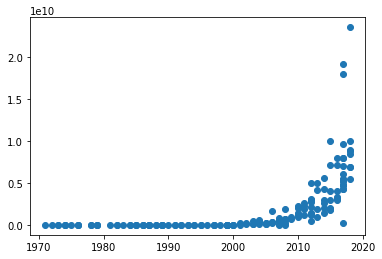

In [ ]:
plt.scatter(X,Y)

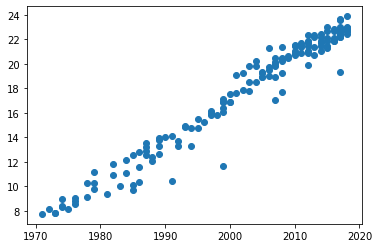

In [ ]:
y=np.log(Y)
plt.scatter(X,y)

In [ ]:
X=X-X.mean()

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),loss='mse')

In [ ]:
def schedule(ep,lr):
  if(ep>=50):
    return 0.0001
  return 0.001

In [ ]:
scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r=model.fit(X,y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 374.2602
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 324.2991
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 423.9189
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 244.4057
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 154.2633
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 138.6076
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 87.0271
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 62.1248
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 47.9515
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 38.2054
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 37.7066
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 20.3864
Epoch 13/200
6/6 [=========================

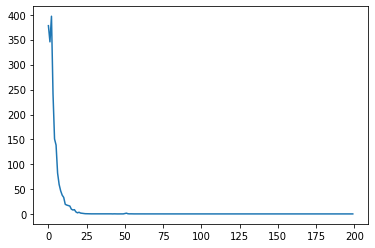

In [ ]:
plt.plot(r.history['loss'],label='loss')

In [ ]:
model.layers[0].get_weights()

[array([[0.35319906]], dtype=float32), array([17.783375], dtype=float32)]

In [ ]:
a=model.layers[0].get_weights()[0][0,0]

In [ ]:
a

0.35319906

In [ ]:
print("To double the time: ",np.log(2)/a)

To double the time:  1.962483057781254


Predicting the output

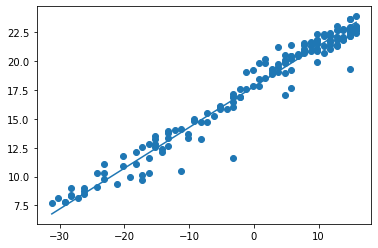

In [ ]:
Yhat=model.predict(X).flatten()
plt.scatter(X,y)
plt.plot(X,Yhat)

In [ ]:
w,b=model.layers[0].get_weights()
X=X.reshape(-1,1)
yhat=(X.dot(w)+b).flatten()
np.allclose(Yhat, yhat)

True

# Practice

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
df=pd.read_csv("Summary of Weather.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

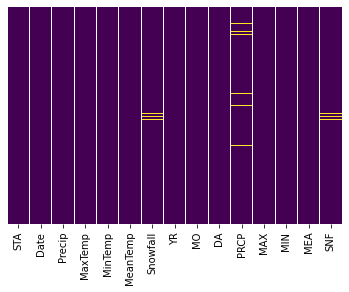

In [36]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
def convert(data):
  if(data=='T'):
    return 0
  else:
    return float(data)

In [27]:
df['Precip']=df['Precip'].apply(convert)

In [28]:
df['Precip'].dropna(inplace=True)

In [29]:
df.drop(['PoorWeather'],axis=1,inplace=True)

In [31]:
df['SNF']=df['SNF'].apply(convert)

In [32]:
df['SNF'].dropna(inplace=True)

In [33]:
df.drop(['SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],axis=1,inplace=True)

In [35]:
df.drop(['DR','SPD','WindGustSpd'],axis=1,inplace=True)

In [37]:
df.dropna(inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86096 entries, 0 to 88830
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       86096 non-null  int64  
 1   Date      86096 non-null  object 
 2   Precip    86096 non-null  float64
 3   MaxTemp   86096 non-null  float64
 4   MinTemp   86096 non-null  float64
 5   MeanTemp  86096 non-null  float64
 6   Snowfall  86096 non-null  object 
 7   YR        86096 non-null  float64
 8   MO        86096 non-null  float64
 9   DA        86096 non-null  float64
 10  PRCP      86096 non-null  object 
 11  MAX       86096 non-null  float64
 12  MIN       86096 non-null  float64
 13  MEA       86096 non-null  float64
 14  SNF       86096 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 10.5+ MB


In [49]:
X=df.drop(['MAX','Date','PRCP','Snowfall'],axis=1)
y=df['MAX']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86096 entries, 0 to 88830
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       86096 non-null  int64  
 1   Precip    86096 non-null  float64
 2   MaxTemp   86096 non-null  float64
 3   MinTemp   86096 non-null  float64
 4   MeanTemp  86096 non-null  float64
 5   YR        86096 non-null  float64
 6   MO        86096 non-null  float64
 7   DA        86096 non-null  float64
 8   MIN       86096 non-null  float64
 9   MEA       86096 non-null  float64
 10  SNF       86096 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 7.9 MB


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
np.array(X_train).shape

(57684, 11)

In [42]:
np.array(y).reshape(-1,1).shape

(86096, 1)

In [75]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Dense(128,input_shape=(11,),activation='relu'),
      tf.keras.layers.Dense(1)
])

In [44]:
def schedule(ep):
  if(ep>=50):
    return 0.001
  else:
    return 0.01

In [76]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mse')

In [ ]:
scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [77]:
r=model.fit(X,y,epochs=50)

Epoch 1/50
2691/2691 [==============================] - 4s 1ms/step - loss: 224512.9048
Epoch 2/50
2691/2691 [==============================] - 3s 1ms/step - loss: 17.5727
Epoch 3/50
2691/2691 [==============================] - 3s 1ms/step - loss: 23.8546
Epoch 4/50
2691/2691 [==============================] - 3s 1ms/step - loss: 158.9843
Epoch 5/50
2691/2691 [==============================] - 3s 1ms/step - loss: 56.7802
Epoch 6/50
2691/2691 [==============================] - 3s 1ms/step - loss: 105.7100
Epoch 7/50
2691/2691 [==============================] - 3s 1ms/step - loss: 149.6461
Epoch 8/50
2691/2691 [==============================] - 3s 1ms/step - loss: 69.7706
Epoch 9/50
2691/2691 [==============================] - 3s 1ms/step - loss: 51.7954
Epoch 10/50
2691/2691 [==============================] - 3s 1ms/step - loss: 148.6264
Epoch 11/50
2691/2691 [==============================] - 3s 1ms/step - loss: 201.2268
Epoch 12/50
2691/2691 [==============================] - 3s 1ms/s

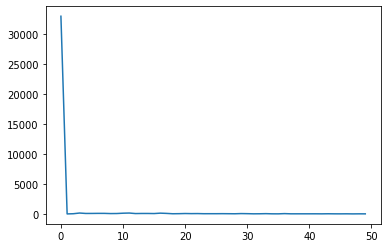

In [80]:
plt.plot(r.history['loss'],label='loss')

In [79]:
pred=model.predict(X_test)


In [93]:
from sklearn import metrics
print("Mean Error: {}".format(metrics.mean_absolute_error(y_test,pred)))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("R2 Score ",metrics.r2_score(y_test,pred))


Mean Error: 1.9585235202455544
Mean Squared Error:  4.668018953656717
Root Mean Squared Error:  2.160559870417091
R2 Score  0.9793226748422678
